In [4]:
import pandas as pd
from datetime import datetime
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Analiza treści czatu transmisji posiedzeń sejmu
- Treść czatu pobrana została przy pomocy narzędzie `yt-dlp`
- Ze względu na wielkość danych, nie zostały one załączone w repozytorium
- Z analizy wykluczone zostały "stop-słowa", które nie wnoszą nic do treści (np. "jak", "czy", "przed").

In [5]:
filepath = "./1. Posiedzenie Sejmu - dzień dziewiąty,  11 grudnia 2023 r. [c4WtsVXtxXg].live_chat.json"
title = '1. Posiedzenie Sejmu - dzień dziewiąty, 11 grudnia 2023 r.'

In [6]:
data = []
for line in open(filepath).readlines():
    item = json.loads(line)['replayChatItemAction']['actions'][0]['addChatItemAction']['item']

    try:
        message = item['liveChatTextMessageRenderer']['message']['runs'][0]['text']
        timestamp = datetime.fromtimestamp(int(item['liveChatTextMessageRenderer']['timestampUsec'])/1000000)
        author = item['liveChatTextMessageRenderer']['authorName']['simpleText']

        data.append({
            "message": message,
            "timestamp": timestamp,
            "author": author
        })

    except KeyError:
        continue

In [15]:
STOP_WORDS = ['wszyscy', 'pan', 'pana', 'mamy', 'jestem', 'jaki', 'dlaczego', 'pani', 'nas', 'dalej', 'przed', 'niż', 'bardzo', 'wszystkich', 'też', 'trzeba', 'żeby', 'czemu', 'mnie', 'której', 'znowu', 'ilu', 'tej', 'im', 'był', 'będą', 'mam', 'mają', 'chce', 'ci', 'wy', 'oni', 'my', 'sobie', 'bedzie', 'nawet', 'jego', 'zaraz', 'być', 'bez', 'może', 'ta', 'by', 'was', 'coś', 'mi', 'nic', 'ktoś', 'można', 'te', 'tym', 'ich', 'są', 'gdzie', 'że', 'ty', 'tych', 'i', 'go', 'ale', 'w', 'od', 'sie', 'o', 'tu', 'na', 'tak', 'tego', 'to', 'juz', 'kto', 'niech', 'za', '?', 'a', 'z', 'on', 'ze', 'ten', 'nie', 'już', 'jeszcze', 'było', 'dla', 'jak', 'czy', 'tylko', 'jest', 'po', 'będzie', 'mówi', '!', 'no', 'ma', 'mu', 'tam', 'do', 'pis', 'chyba', 'ile', 'kiedy', 'co', 'się', 'ja', '-', 'oni', 'przez', 'bo', 'teraz']

In [16]:
def filter_tokens(tokens, stopwords=STOP_WORDS):
    results = []
    for token in tokens:
        token = token.lower()
        if token in stopwords:
            continue
        if not token.isalnum():
            continue
        if token.isnumeric():
            continue
        results.append(token)
    return results

In [17]:
df = pd.DataFrame(data)

In [18]:
tokens = []
for line in df['message']:
    _tokens = filter_tokens(line.split())
    tokens.extend(_tokens)

In [19]:
top_50 = pd.Series(tokens).value_counts()[:50]

_counts = ((top_50 / 100).astype(int)).to_dict()

findfont: Font family 'DroidSansMono' not found.
findfont: Font family 'DroidSansMono' not found.
findfont: Font family 'DroidSansMono' not found.
findfont: Font family 'DroidSansMono' not found.
findfont: Font family 'DroidSansMono' not found.


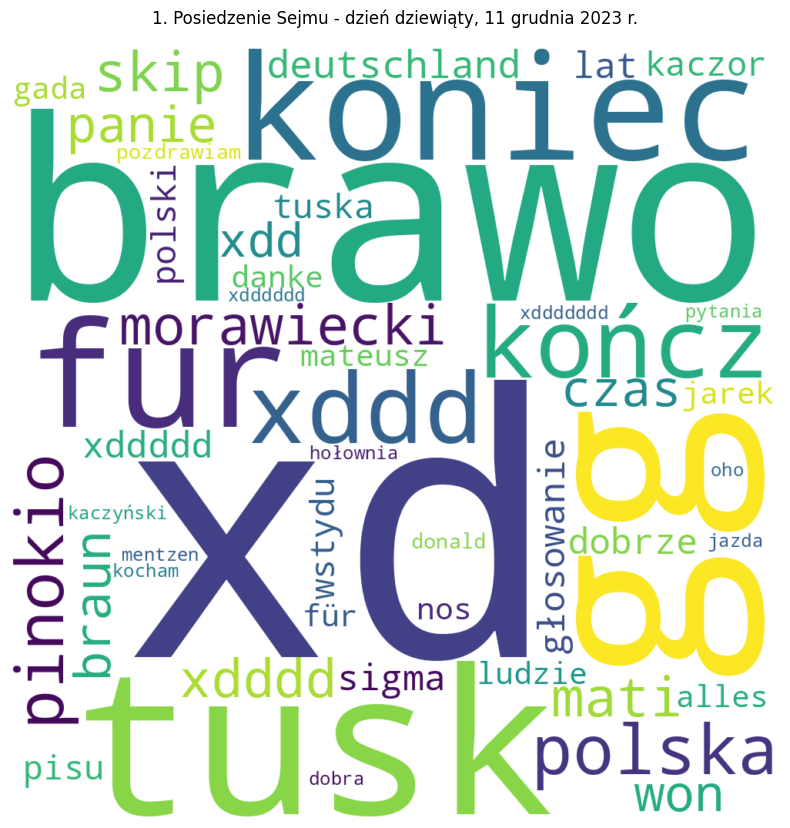

In [21]:
wc = WordCloud(
    background_color="white",
    width=1000,
    max_words=50,
    height=1000, 
    relative_scaling=0.5
).generate_from_frequencies(_counts)
plt.figure(figsize=(10, 10))
plt.title(title, y=1.02, fontname="DroidSansMono")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()